In [95]:
#new notebook for standardization and normalization
import pandas as pd

In [96]:
data_a = {'id': ['1','2','3'],
          'first': ['Alex','Allay','Alen'],
          'last': ['Anderson','Ackerman','Ali'],
          
               
    
}

dataframe_a = pd.DataFrame(data_a,columns =['id','first','last'])

In [97]:
    
data_b = {'id': ['4','5','6'],
          'first': ['Billy','Brian','Bran'],
          'last': ['Blonder','Black','Balwner'],
          
               
    
}

dataframe_b = pd.DataFrame(data_b,columns =['id','first','last'])

In [98]:
data_a

{'id': ['1', '2', '3'],
 'first': ['Alex', 'Allay', 'Alen'],
 'last': ['Anderson', 'Ackerman', 'Ali']}

In [99]:
pd.concat([dataframe_a,dataframe_b],axis =0)

,id,first,last
0,1,Alex,Anderson
1,2,Allay,Ackerman
2,3,Alen,Ali
0,4,Billy,Blonder
1,5,Brian,Black
2,6,Bran,Balwner


In [100]:
data_b

{'id': ['4', '5', '6'],
 'first': ['Billy', 'Brian', 'Bran'],
 'last': ['Blonder', 'Black', 'Balwner']}

In [101]:
pd.concat([dataframe_a,dataframe_b],axis =1)

,id,first,last,id,first,last
0,1,Alex,Anderson,4,Billy,Blonder
1,2,Allay,Ackerman,5,Brian,Black
2,3,Alen,Ali,6,Bran,Balwner


In [102]:
dataframe_a.rename(columns={'id': 'student_id'}, inplace=True)

In [103]:
pd.concat([dataframe_a,dataframe_b],axis =0)

,student_id,first,last,id
0,1,Alex,Anderson,NaN
1,2,Allay,Ackerman,NaN
2,3,Alen,Ali,NaN
0,NaN,Billy,Blonder,4
1,NaN,Brian,Black,5
2,NaN,Bran,Balwner,6


## Merging (also called join)

In [104]:
employee_data = {'employee_id':['1','2','3','4'],
                 'name': ['Amy jones','Allen Keys','Alice Bees','Tim HOrtons']
                 
                
                }
dataframe_employees = pd.DataFrame(employee_data,columns =['employee_id','name'])

In [105]:
sales_data = {'employee_id':['3','4','5','6'],
                 'total_sales': [23456,2512,2345,1455]
                 
                
                }
dataframe_sales = pd.DataFrame(sales_data,columns =['employee_id','total_sales'])

In [106]:
#the default value for how is inner
pd.merge(dataframe_employees,dataframe_sales,on ='employee_id')

,employee_id,name,total_sales
0,3,Alice Bees,23456
1,4,Tim HOrtons,2512


In [107]:
pd.merge(dataframe_employees,dataframe_sales,on ='employee_id',how ='outer')

,employee_id,name,total_sales
0,1,Amy jones,NaN
1,2,Allen Keys,NaN
2,3,Alice Bees,23456.0
3,4,Tim HOrtons,2512.0
4,5,NaN,2345.0
5,6,NaN,1455.0


In [157]:
pd.merge(dataframe_employees,dataframe_sales,on ='employee_id',how ='left')

,employee_id,name,total_sales
0,1,Amy jones,NaN
1,2,Allen Keys,NaN
2,3,Alice Bees,23456.0
3,4,Tim HOrtons,2512.0


In [156]:
pd.merge(dataframe_employees,dataframe_sales,left_on ='employee_id',right_on ='employee_id')

,employee_id,name,total_sales
0,3,Alice Bees,23456
1,4,Tim HOrtons,2512


In [109]:
dataframe_employees.set_index('employee_id')

,name
employee_id,
1,Amy jones
2,Allen Keys
3,Alice Bees
4,Tim HOrtons


In [110]:
dataframe_sales.set_index('employee_id')

,total_sales
employee_id,
3,23456
4,2512
5,2345
6,1455


In [111]:
pd.merge(dataframe_employees,dataframe_sales,left_index=True,right_index=True)

,employee_id_x,name,employee_id_y,total_sales
0,1,Amy jones,3,23456
1,2,Allen Keys,4,2512
2,3,Alice Bees,5,2345
3,4,Tim HOrtons,6,1455


In [112]:
#Lecture 5 from slides

In [113]:
import numpy as np
from sklearn import preprocessing


In [63]:
feature =np.array([[-500.5],
                   [-100.1],
                    [0],
                    [100.1],
                    [900.9]]
                   )

In [114]:
feature

array([[-500.5],
       [-100.1],
       [   0. ],
       [ 100.1],
       [ 900.9]])

In [115]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

In [116]:
scaled_features =minmax_scale.fit_transform(feature)

In [117]:
scaled_features

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

In [118]:
df = pd.read_csv('./data/adv_python_class_5_titanic.csv')

In [119]:
df.head()

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes


array([[<Axes: title={'center': 'fare'}>]], dtype=object)

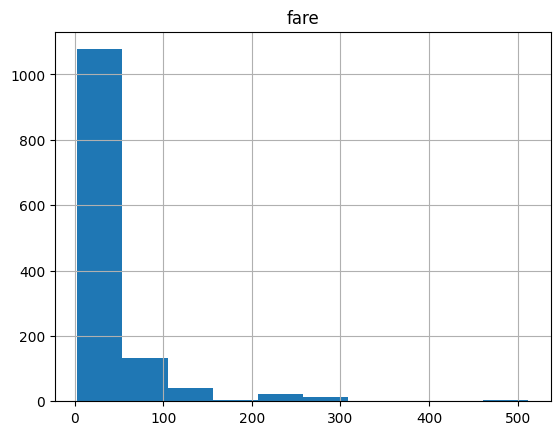

In [120]:
# histogram of fare
df.hist('fare')

In [121]:
print(type(df['fare']))

<class 'pandas.core.series.Series'>


In [130]:
fare_column_reshaped = df['fare'].values.reshape(-1, 1)
scaled_fare =minmax_scale.fit_transform(fare_column_reshaped)

In [149]:
print(type(scaled_fare))

<class 'numpy.ndarray'>


In [137]:
df['scaled_fare'] = scaled_fare

In [139]:
df.head()

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived,scaled_fare
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no,0.008014
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no,0.033435
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no,0.033435
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes,0.033435
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes,0.008054


In [140]:
print(type(df['scaled_fare']))

<class 'pandas.core.series.Series'>


array([[<Axes: title={'center': 'scaled_fare'}>]], dtype=object)

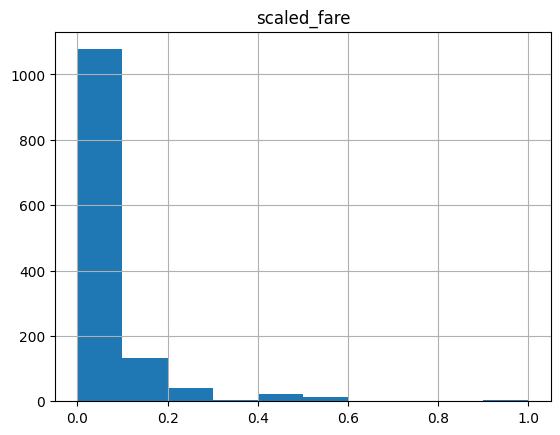

In [143]:
df.hist(['scaled_fare'])

In [125]:
## Standardization

In [126]:
x = np.array(
    [[-1000.1],
     [-200.2],
     [500.5],
     [600.6],
     [9000.9]
        
    ]
)

In [127]:
scaler =preprocessing.StandardScaler()

In [128]:
standardized =scaler.fit_transform(x)

In [89]:
standardized

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

array([[<Axes: title={'center': 'fare'}>]], dtype=object)

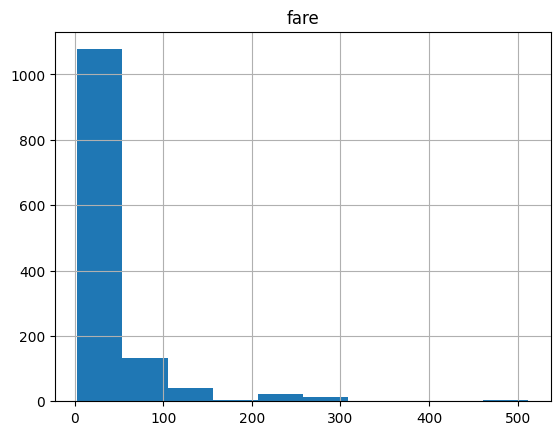

In [148]:
df.hist('fare')

In [150]:
# on column on fare and plot histogram
standardized = scaler.fit_transform(fare_column_reshaped)

In [151]:
print(type(standardized))

<class 'numpy.ndarray'>


In [152]:
df['standarized_fare'] =standardized

In [153]:
df.head(5)

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived,scaled_fare,standarized_fare
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no,0.008014,-0.503660
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no,0.033435,-0.255802
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no,0.033435,-0.255802
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes,0.033435,-0.255802
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes,0.008054,-0.503277


array([[<Axes: title={'center': 'standarized_fare'}>]], dtype=object)

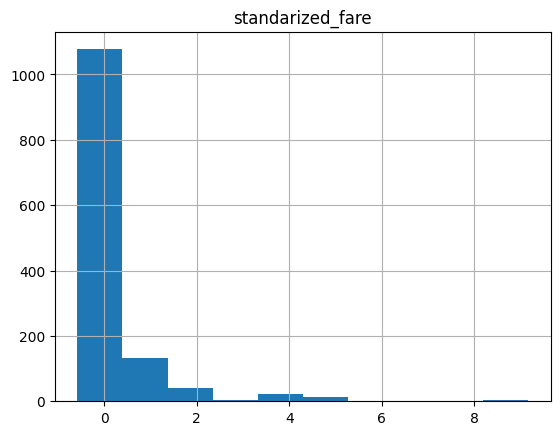

In [155]:
df.hist('standarized_fare')